## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Loading music dataset

In [2]:
df = pd.read_csv('my_music.csv') # Task: load the dataset 
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.0623,0.0116,2,-27.893,1,0.0567,0.991,0.445000,0.0816,0.0331,65.057,0S0YKiEdR9cT9pYgEaTevF,415800,3
1,0.2330,0.0217,1,-29.785,1,0.0413,0.988,0.819000,0.0836,0.0710,66.349,1ZqzUiCQICQmjtpbFZYwnt,253293,3
2,0.1960,0.0539,5,-28.217,1,0.0438,0.993,0.031600,0.1160,0.0482,132.747,3vA1AS2PWl4RePRCiR36lb,236907,3
3,0.0986,0.0949,1,-21.002,1,0.0441,0.993,0.353000,0.0847,0.0363,174.628,1aJcDNDrKduMegTZzOemVd,232667,4
4,0.1370,0.0759,11,-25.740,0,0.0401,0.975,0.263000,0.1050,0.0363,142.767,4htAzv3rkpAzCjo2pW12id,180000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,0.4580,0.1550,10,-17.853,1,0.0405,0.908,0.621000,0.2990,0.2760,126.281,2bPeAxNC1S1C359ds8Tw3X,526893,4
2925,0.6490,0.2710,5,-15.198,0,0.0498,0.708,0.000005,0.1240,0.6260,126.026,4jCoxXaEKeTWkQ7HL1d5de,441027,4
2926,0.3500,0.6070,5,-11.141,0,0.0498,0.794,0.446000,0.1160,0.5970,187.101,1QlTNF43OyKK9BorIRsJ8o,422640,4
2927,0.3550,0.1520,5,-14.864,0,0.0401,0.924,0.077100,0.1260,0.1450,65.215,6x8XKDM8Rnid4TyOUg9kj3,320773,4


## Remove strings 

In [3]:
# We are removing ID as we want to train our model exclusively on numerical variables

df_noid = df.drop("id", axis=1)
df_noid

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.0623,0.0116,2,-27.893,1,0.0567,0.991,0.445000,0.0816,0.0331,65.057,415800,3
1,0.2330,0.0217,1,-29.785,1,0.0413,0.988,0.819000,0.0836,0.0710,66.349,253293,3
2,0.1960,0.0539,5,-28.217,1,0.0438,0.993,0.031600,0.1160,0.0482,132.747,236907,3
3,0.0986,0.0949,1,-21.002,1,0.0441,0.993,0.353000,0.0847,0.0363,174.628,232667,4
4,0.1370,0.0759,11,-25.740,0,0.0401,0.975,0.263000,0.1050,0.0363,142.767,180000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,0.4580,0.1550,10,-17.853,1,0.0405,0.908,0.621000,0.2990,0.2760,126.281,526893,4
2925,0.6490,0.2710,5,-15.198,0,0.0498,0.708,0.000005,0.1240,0.6260,126.026,441027,4
2926,0.3500,0.6070,5,-11.141,0,0.0498,0.794,0.446000,0.1160,0.5970,187.101,422640,4
2927,0.3550,0.1520,5,-14.864,0,0.0401,0.924,0.077100,0.1260,0.1450,65.215,320773,4


## Scaling features

In [4]:
df_noid.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2.929000e+03,2929.000000
mean,0.599718,0.573785,5.272107,-9.649917,0.611813,0.083079,0.332865,0.122449,0.182386,0.529679,120.328404,2.392848e+05,3.914305
std,0.194524,0.271887,3.579223,6.160127,0.487421,0.084021,0.352801,0.276649,0.153516,0.269609,27.618544,9.167702e+04,0.405516
min,0.000000,0.003410,0.000000,-43.951000,0.000000,0.000000,0.000005,0.000000,0.017300,0.000000,0.000000,9.625000e+03,0.000000
25%,0.490000,0.379000,2.000000,-12.202000,0.000000,0.037500,0.030800,0.000000,0.090400,0.324000,100.499000,1.873870e+05,4.000000
50%,0.626000,0.625000,5.000000,-7.910000,1.000000,0.048800,0.159000,0.000041,0.122000,0.549000,122.668000,2.215650e+05,4.000000
75%,0.743000,0.795000,8.000000,-5.373000,1.000000,0.084600,0.661000,0.017300,0.224000,0.756000,135.027000,2.696400e+05,4.000000
max,0.974000,1.000000,11.000000,-0.040000,1.000000,0.592000,0.996000,0.987000,0.984000,0.984000,221.716000,1.563466e+06,5.000000


In [5]:
# Variables on different scales. K-Means is a distance based algorithm: we need to scale / normalize

In [6]:
scaler = StandardScaler()
scaler.fit(df_noid)
df_noid_scaled = scaler.transform(df_noid)
X_scaled_df = pd.DataFrame(df_noid_scaled, columns = df_noid.columns)
#display new df head
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-2.763203,-2.068067,-0.914351,-2.961984,0.796547,-0.314007,1.865775,1.166120,-0.656632,-1.842168,-2.001584,1.925732,-2.255054
1,-1.885526,-2.030913,-1.193789,-3.269173,0.796547,-0.497326,1.857271,2.518244,-0.643602,-1.701570,-1.954796,0.152826,-2.255054
2,-2.075767,-1.912461,-0.076037,-3.014590,0.796547,-0.467566,1.871445,-0.328446,-0.432513,-1.786151,0.449724,-0.025941,-2.255054
3,-2.576561,-1.761637,-1.193789,-1.843147,0.796547,-0.463995,1.871445,0.833513,-0.636435,-1.830297,1.966391,-0.072198,0.211359
4,-2.379123,-1.831531,1.600591,-2.612419,-1.255419,-0.511611,1.820416,0.508135,-0.504179,-1.830297,0.812585,-0.646780,0.211359


In [7]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2.929000e+03,2.929000e+03,2.929000e+03,2.929000e+03,2.929000e+03,2.929000e+03,2.929000e+03,2.929000e+03,2.929000e+03,2.929000e+03,2.929000e+03,2.929000e+03,2.929000e+03
mean,8.733199e-17,9.703554e-17,-2.668477e-17,2.037746e-16,-3.881422e-17,-3.881422e-17,1.940711e-17,-3.881422e-17,-7.762843e-17,-2.522924e-16,6.598417e-16,-9.703554e-18,-1.455533e-16
std,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00
min,-3.083526e+00,-2.098195e+00,-1.473227e+00,-5.569194e+00,-1.255419e+00,-9.889555e-01,-9.436412e-01,-4.426894e-01,-1.075552e+00,-1.964959e+00,-4.357541e+00,-2.505524e+00,-9.654293e+00
25%,-5.641274e-01,-7.165400e-01,-9.143508e-01,-4.143614e-01,-1.255419e+00,-5.425608e-01,-8.563384e-01,-4.426894e-01,-5.992994e-01,-7.630118e-01,-7.180969e-01,-5.661900e-01,2.113587e-01
50%,1.351343e-01,1.884017e-01,-7.603689e-02,2.824965e-01,7.965467e-01,-4.080472e-01,-4.928985e-01,-4.425423e-01,-3.934227e-01,7.167413e-02,8.472551e-02,-1.933175e-01,2.113587e-01
75%,7.367050e-01,8.137679e-01,7.622770e-01,6.944090e-01,7.965467e-01,1.811102e-02,9.302436e-01,-3.801447e-01,2.711158e-01,8.395851e-01,5.322911e-01,3.311673e-01,2.113587e-01
max,1.924422e+00,1.567886e+00,1.600591e+00,1.560286e+00,7.965467e-01,6.058129e+00,1.879950e+00,3.125615e+00,5.222579e+00,1.685400e+00,3.671624e+00,1.444645e+01,2.677772e+00


Now, all features will have the same weight.

## Plot feature correlation heatmap

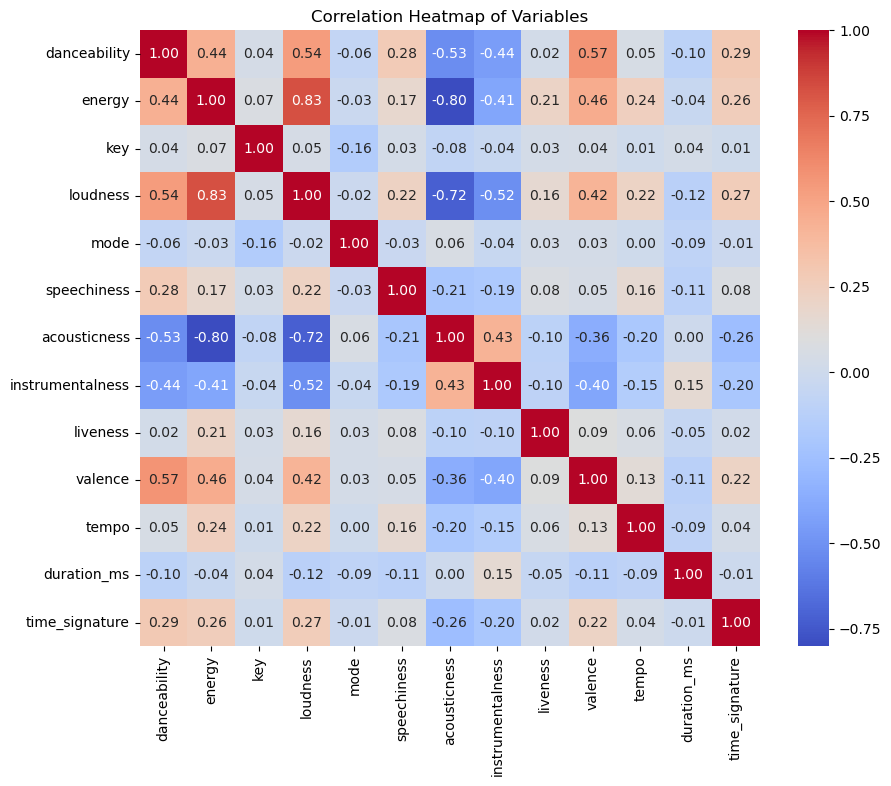

In [8]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = X_scaled_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

## Clustering the wines with K-Means

We will pick manually the number of clusters we want - let's set it to 17. Later we will discuss how many clusters we should have. I've set to 17 as default as this was the number of genre-orientated playlists compiled to build our dataframe. 

When randomness is involved (remember, **K-means picks the initial centroid randomly**), we better use a random seed so that we can reproduce our results. We can set this directly with **random_state**.

In [9]:
kmeans = KMeans(n_clusters=17, random_state=1234)
kmeans.fit(X_scaled_df)

/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=17, random_state=1234)

In [10]:
labels = kmeans.labels_
labels

array([14, 14, 14, ..., 11,  7,  4], dtype=int32)

In [11]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int32)

Now that we have our model, let's get the clusters and see how many observations each cluster has.

In [12]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0      75
1     221
2     242
3     111
4     253
5     146
6     157
7     124
8     236
9     119
10     29
11    125
12    386
13    302
14    105
15    191
16    107
Name: count, dtype: int64

In [13]:
clusters

array([14, 14, 14, ..., 11,  7,  4], dtype=int32)

In [29]:
# Add cluster to df
df["cluster"] = clusters
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,cluster
0,0.0623,0.0116,2,-27.893,1,0.0567,0.991,0.445000,0.0816,0.0331,65.057,0S0YKiEdR9cT9pYgEaTevF,415800,3,14
1,0.2330,0.0217,1,-29.785,1,0.0413,0.988,0.819000,0.0836,0.0710,66.349,1ZqzUiCQICQmjtpbFZYwnt,253293,3,14
2,0.1960,0.0539,5,-28.217,1,0.0438,0.993,0.031600,0.1160,0.0482,132.747,3vA1AS2PWl4RePRCiR36lb,236907,3,14
3,0.0986,0.0949,1,-21.002,1,0.0441,0.993,0.353000,0.0847,0.0363,174.628,1aJcDNDrKduMegTZzOemVd,232667,4,3
4,0.1370,0.0759,11,-25.740,0,0.0401,0.975,0.263000,0.1050,0.0363,142.767,4htAzv3rkpAzCjo2pW12id,180000,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,0.4580,0.1550,10,-17.853,1,0.0405,0.908,0.621000,0.2990,0.2760,126.281,2bPeAxNC1S1C359ds8Tw3X,526893,4,0
2925,0.6490,0.2710,5,-15.198,0,0.0498,0.708,0.000005,0.1240,0.6260,126.026,4jCoxXaEKeTWkQ7HL1d5de,441027,4,0
2926,0.3500,0.6070,5,-11.141,0,0.0498,0.794,0.446000,0.1160,0.5970,187.101,1QlTNF43OyKK9BorIRsJ8o,422640,4,11
2927,0.3550,0.1520,5,-14.864,0,0.0401,0.924,0.077100,0.1260,0.1450,65.215,6x8XKDM8Rnid4TyOUg9kj3,320773,4,7


In [74]:
df.to_csv('my_music_training_data.csv', index=False)

print("DataFrame exported to CSV successfully.")

DataFrame exported to CSV successfully.


## Asking a user to input a song

In [76]:
# Ask the user to input a song
song = input("Please enter the name of a song. Tip: include the artist name for optimal results: ")

# Print the song name entered by the user
print("You entered the search:", song)

Please enter the name of a song. Tip: include the artist name for optimal results:  blue one love


You entered the search: blue one love


## Search song that user has input and retrieve track_id 

In [77]:
# Searching user input on Spotify 

import config
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

song_result = sp.search(q=song,limit = 1, type = "track")
track_id=song_result["tracks"]["items"][0]["id"]
track_id


'2W5acFzXf5FrktecuD30Or'

In [78]:
from IPython.display import IFrame

IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

## Retrieve audio features from track_id

In [79]:
sp.audio_features(track_id)

[{'danceability': 0.683,
  'energy': 0.722,
  'key': 8,
  'loudness': -4.039,
  'mode': 0,
  'speechiness': 0.0358,
  'acousticness': 0.0243,
  'instrumentalness': 4.2e-05,
  'liveness': 0.35,
  'valence': 0.854,
  'tempo': 95.012,
  'type': 'audio_features',
  'id': '2W5acFzXf5FrktecuD30Or',
  'uri': 'spotify:track:2W5acFzXf5FrktecuD30Or',
  'track_href': 'https://api.spotify.com/v1/tracks/2W5acFzXf5FrktecuD30Or',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2W5acFzXf5FrktecuD30Or',
  'duration_ms': 207187,
  'time_signature': 4}]

## Create scaled array of sample 

In [80]:
# Create DataFrame from dictionary
sample_df = pd.DataFrame(sp.audio_features(track_id)).drop(columns = ["id","type","uri","track_href","analysis_url"]) # Remove non-numerical columns and ID
sample_array_scaled = scaler.transform(sample_df)
sample_array_scaled

array([[ 0.4282072 ,  0.54522832,  0.76227698,  0.91099995, -1.25541921,
        -0.56279734, -0.87476558, -0.44253756,  1.09201628,  1.2031372 ,
        -0.91680166, -0.35017752,  0.2113587 ]])

## Predict cluster of given sample 

In [81]:
from sklearn.cluster import KMeans

sample_pred = kmeans.predict(sample_array_scaled)
sample_cluster = sample_pred[0]
sample_cluster

/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


2

## Retrieving a sample from a given cluster 

In [82]:
recommendation = df[df['cluster'] == sample_cluster].sample()
recommendation

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,cluster
425,0.847,0.389,9,-15.362,0,0.0569,0.0753,0.000012,0.0471,0.968,111.52,4Cv6ongCvJy9JfSkWVnb5D,293667,4,2


## Playing retrieved sample from given cluster

In [83]:
import numpy as np

# Assuming recommendation.id is a NumPy array
recommendation_id = np.array(recommendation.id)

# Convert the NumPy array to a string
id_string = str(recommendation_id)

# Split the string by single quotes and take the second element (index 1)
recommendation_id_isolated = id_string.split("'")[1]

# Print the extracted value
print("Isolated recommendation id:", recommendation_id_isolated)

Isolated recommendation id: 4Cv6ongCvJy9JfSkWVnb5D


In [85]:
IFrame(src="https://open.spotify.com/embed/track/"+recommendation_id_isolated,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

## Playing with the parameters

**init**: those are the different initialization strategies. By default, sklearn is already using a 'smart' method, not the totally random one we saw.

**n_init**: By default, Scikit-Learn has tried 10 different random initializations and kept the best model.

[Scikitlearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

How does Scikit-Learn know which model is the best? It uses a performance metric called **inertia**. **It is the mean squared distance between each instance and its closest centroid**. It's stored in the inertia_ attribute of the model.

In [15]:
kmeans.inertia_

1277.9284888446423

**max_iter**: It iterates up to 300 times by default (those are the re-computing centroids iterations we saw earlier)

**tol**: This is a way to determine when to stop iterating (if the clusters have changed only veeeery slightly, we assume we have achieved 'convergence')

**algorithm**: There are variations in the implementation of most algorithms and K-Means is no exception. By default, we're using a 'smart' implementation called elkan.

For learning purposes, we will tweak the parameters to replicate the good ol' K-Means - a bit dumber than the Scikit-Learn, yes, but also the original.

In [16]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=5,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

1277.9284888446423


## Choosing K

We have used K=8 by default for now - but we know that 8 might not be the optimal number of clusters for our dataset. Having a metric like inertia, we can compute it for several K values and then use the "elbow method" to choose the best K.

We will now leave all other parameters with their default value, since it seems to work pretty well.

Training a K-Means model with 2 clusters! 



/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 



/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 



/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 



/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 



/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

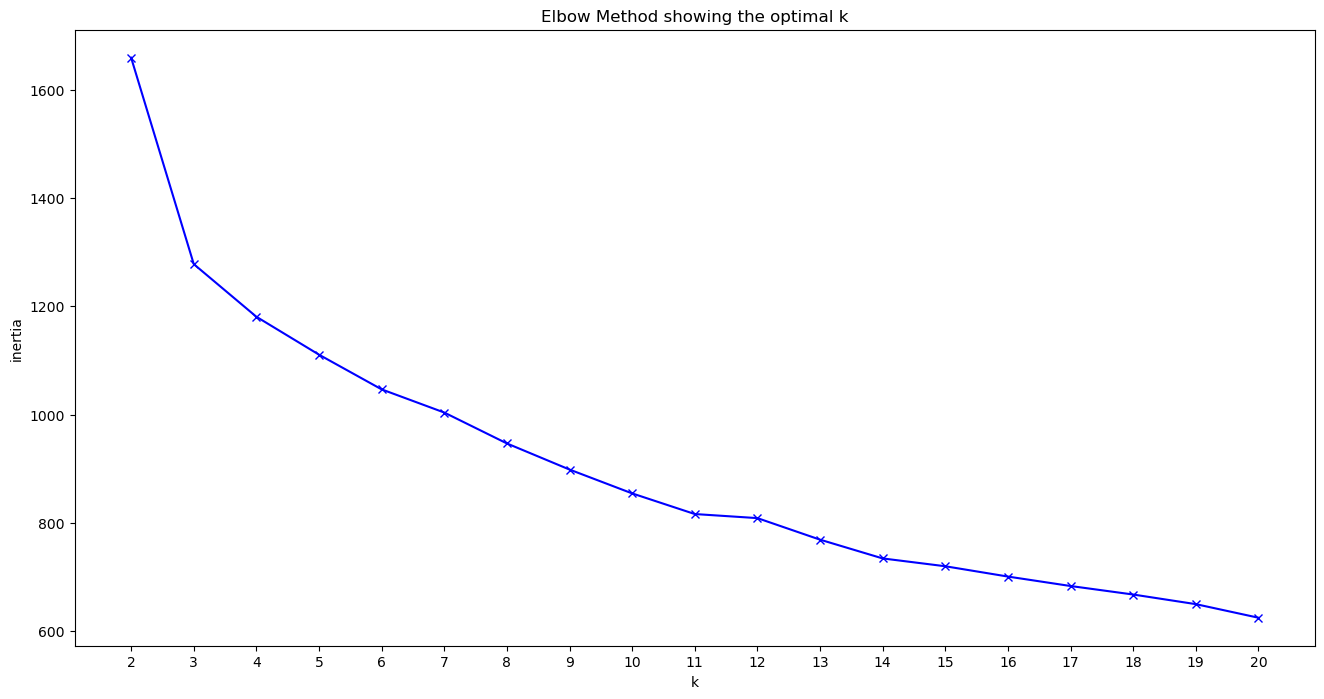

In [17]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at **k=3**, and then a very slight one at k=10, but other than that the plot is quite smooth. What if our business needs involve having a k between 5 and 8?

There is another metric that will help us decide.

## Silhouette

There's a metric called **Silhouette Score** that also measures how similar is an observation is to its own cluster compared to other clusters. For the ith observation, the **Silhouette Score** is:

$$s_{K,L} = (b - a) / max(a,b) $$

Where:

a = mean intra-cluster distance (the average distance between i and every other observation in the cluster where i belongs)

$$ a = \frac{1}{n_{K}}\sum_{i,j\neq{i}}^{n_{K}}d(i,j)$$

b = mean **nearest-cluster** distance (the average distance between i and the observations of the nearest cluster that i is not part of it)

$$ b = \frac{1}{(n_{K}*n_{L})}\sum_{i}^{n_{K}}\sum_{j}^{n_{L}}d(i,j)$$

The silhouette score for the whole model is the **average of all the silhouette scores** of each instance.

$$ S = \frac{2}{N(N-1)}\sum_{c}s_{K,L}$$

Because we divide the substraction of (b-a) by the max of the two distances (which will always be b unless the observation has been wrongly assigned to a cluster it should not belong), we obtain a "normalized score", that ranges from -1 to 1, and that makes it easier to interpret.

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

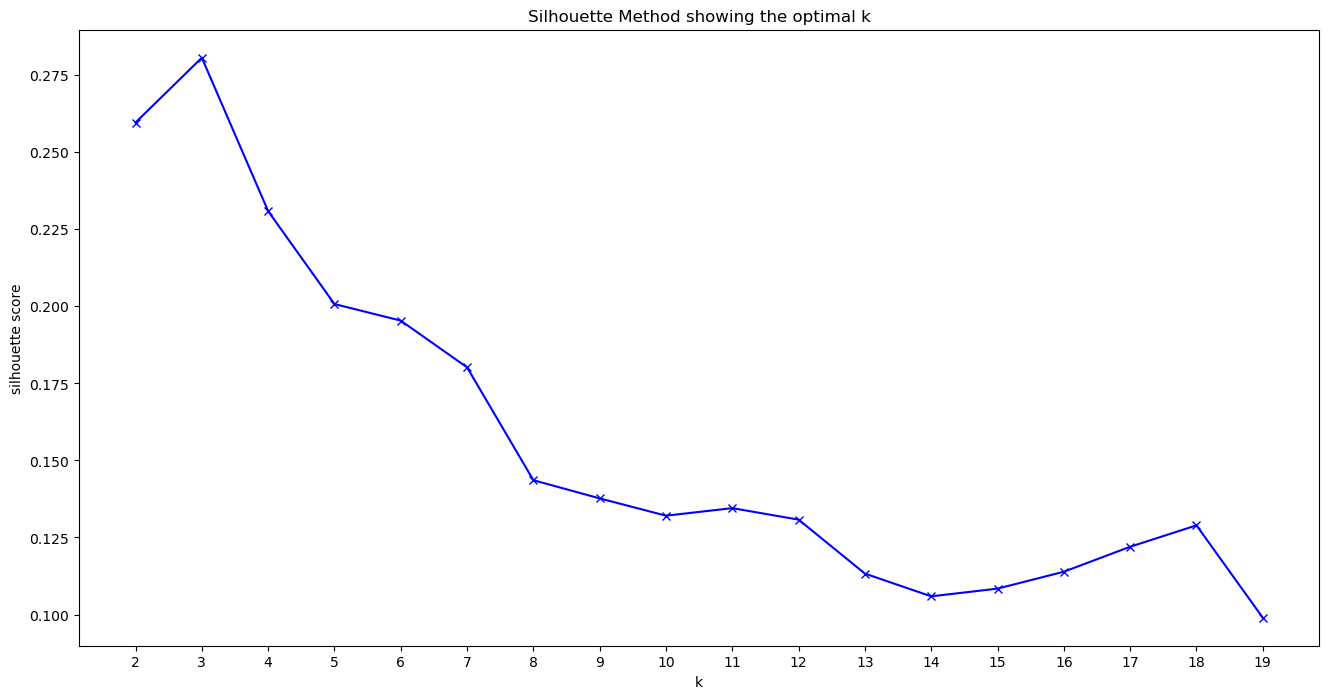

In [18]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

The greater the Silhouette, the greater the separation between the clusters. In other words, the clusters will be more defined.

<b> advanced (optional)

In [19]:
conda install -c districtdatalabs yellowbrick

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.1



## Package Plan ##

  environment location: /Users/matthewbatchelor/anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.2.2           |  py311hecd8cb5_0         161 KB
    yellowbrick-1.5            |  py311hecd8cb5_0         350 KB
    ------------------------------------------------------------
                                           Total:         511 KB

The following NEW packages will be INSTALLED:

  yellowbrick        pkgs/main/osx-64::yellowbrick-1.5-py311hecd8cb5_0 

/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


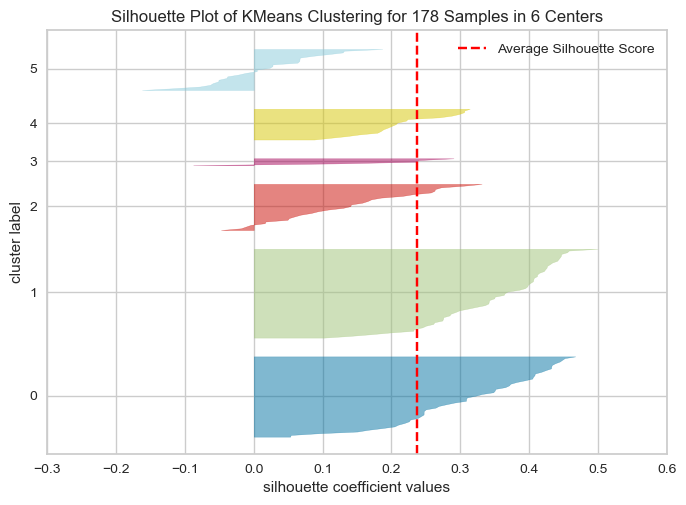

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Saving with pickle

In [ ]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [ ]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [ ]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

In [ ]:
scaler= load(filename="Model/scaler.pickle")

In [ ]:
kmeans_model = load(filename="Model/kmeans_4.pickle")

In [ ]:
kmeans_model

In [ ]:
scaler2 = load("Model/scaler.pickle")

# Time to work!

Time to clusterize the songs in your database and see what they look like. 